In [1]:
from unityagents import UnityEnvironment
import numpy as np
import time
import matplotlib.pyplot as plt
from collections import deque
import torch
from maddpg_agent import MADDPG

In [2]:
env = UnityEnvironment(file_name='../Tennis.app')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


In [3]:
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [4]:
#reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


In [5]:
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
i = 0
while True:
    i+=1
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        print(i)
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

14
Total score (averaged over agents) this episode: -0.004999999888241291


In [6]:
state_dim = int(env_info.vector_observations.shape[1])
action_dim = int(brain.vector_action_space_size)

In [7]:
agent = MADDPG(num_agents, state_dim, action_dim, 10)

In [8]:
def ddpg(n_episodes=10, max_t=1000):
    scores_window = deque(maxlen=100)
    scores = []
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        agent.reset()
        scores_episode = np.zeros(num_agents)
            
        for t in range(max_t):
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]       
            next_states = env_info.vector_observations     
            rewards = env_info.rewards
            rewards = [0.1 if rew > 0 else 0 for rew in rewards]
            dones = env_info.local_done        
            agent.step(states, actions, rewards, next_states, dones) 
            states = next_states
            scores_episode += rewards
            
            print('\rEpisode {}\tStep: {:.2f}\t Score: {:.2f}'.format(i_episode, t, np.mean(scores)), end="")
            if np.any(dones):
                break 
        score = np.max(scores_episode)
        scores_window.append(score)       
        scores.append(score)

        print('\rEpisode {}\tScore: {:.2f}\tAverage Score: {:.2f}'.format(i_episode, score, np.mean(scores_window)))
        
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            
        if np.mean(scores_window)>=0.5:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            for i, agent_i in enumerate(agent.agents):
                torch.save(agent_i.actor_local.state_dict(),  f"../model_weights/actor_agent_{i+1}.pth")
                torch.save(agent_i.critic_local.state_dict(), f"../model_weights/critic_agent_{i+1}.pth")
            break
            
    return scores

In [9]:
scores = ddpg(n_episodes=3000)

Episode 1	Step: 0.00	 Score: nan

/Users/kirankumar/opt/anaconda3/envs/drl/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/kirankumar/opt/anaconda3/envs/drl/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Episode 1	Score: 0.00	Average Score: 0.00
Episode 2	Score: 0.00	Average Score: 0.00
Episode 3	Score: 0.00	Average Score: 0.00
Episode 4	Score: 0.00	Average Score: 0.00
Episode 5	Score: 0.00	Average Score: 0.00
Episode 6	Score: 0.00	Average Score: 0.00
Episode 7	Score: 0.00	Average Score: 0.00
Episode 8	Score: 0.00	Average Score: 0.00
Episode 9	Score: 0.00	Average Score: 0.00
Episode 10	Score: 0.00	Average Score: 0.00
Episode 11	Score: 0.00	Average Score: 0.00
Episode 12	Score: 0.00	Average Score: 0.00
Episode 13	Score: 0.00	Average Score: 0.00
Episode 14	Score: 0.00	Average Score: 0.00
Episode 15	Score: 0.00	Average Score: 0.00
Episode 16	Score: 0.00	Average Score: 0.00
Episode 17	Score: 0.00	Average Score: 0.00
Episode 18	Score: 0.00	Average Score: 0.00
Episode 19	Score: 0.00	Average Score: 0.00
Episode 20	Score: 0.00	Average Score: 0.00
Episode 21	Score: 0.00	Average Score: 0.00
Episode 22	Score: 0.00	Average Score: 0.00
Episode 23	Score: 0.00	Average Score: 0.00
Episode 24	Score: 0.

Episode 189	Score: 0.00	Average Score: 0.00
Episode 190	Score: 0.00	Average Score: 0.00
Episode 191	Score: 0.00	Average Score: 0.00
Episode 192	Score: 0.00	Average Score: 0.00
Episode 193	Score: 0.00	Average Score: 0.00
Episode 194	Score: 0.00	Average Score: 0.00
Episode 195	Score: 0.00	Average Score: 0.00
Episode 196	Score: 0.00	Average Score: 0.00
Episode 197	Score: 0.00	Average Score: 0.00
Episode 198	Score: 0.00	Average Score: 0.00
Episode 199	Score: 0.00	Average Score: 0.00
Episode 200	Score: 0.00	Average Score: 0.00
Episode 200	Average Score: 0.00
Episode 201	Score: 0.00	Average Score: 0.00
Episode 202	Score: 0.00	Average Score: 0.00
Episode 203	Score: 0.00	Average Score: 0.00
Episode 204	Score: 0.00	Average Score: 0.00
Episode 205	Score: 0.00	Average Score: 0.00
Episode 206	Score: 0.00	Average Score: 0.00
Episode 207	Score: 0.00	Average Score: 0.00
Episode 208	Score: 0.00	Average Score: 0.00
Episode 209	Score: 0.00	Average Score: 0.00
Episode 210	Score: 0.00	Average Score: 0.00


Episode 373	Score: 0.00	Average Score: 0.00
Episode 374	Score: 0.00	Average Score: 0.00
Episode 375	Score: 0.00	Average Score: 0.00
Episode 376	Score: 0.00	Average Score: 0.00
Episode 377	Score: 0.00	Average Score: 0.00
Episode 378	Score: 0.10	Average Score: 0.00
Episode 379	Score: 0.00	Average Score: 0.00
Episode 380	Score: 0.10	Average Score: 0.00
Episode 381	Score: 0.00	Average Score: 0.00
Episode 382	Score: 0.00	Average Score: 0.00
Episode 383	Score: 0.00	Average Score: 0.00
Episode 384	Score: 0.00	Average Score: 0.00
Episode 385	Score: 0.00	Average Score: 0.00
Episode 386	Score: 0.00	Average Score: 0.00
Episode 387	Score: 0.00	Average Score: 0.00
Episode 388	Score: 0.00	Average Score: 0.00
Episode 389	Score: 0.00	Average Score: 0.00
Episode 390	Score: 0.00	Average Score: 0.00
Episode 391	Score: 0.00	Average Score: 0.00
Episode 392	Score: 0.00	Average Score: 0.00
Episode 393	Score: 0.00	Average Score: 0.00
Episode 394	Score: 0.00	Average Score: 0.00
Episode 395	Score: 0.00	Average 

Episode 557	Score: 0.10	Average Score: 0.02
Episode 558	Score: 0.10	Average Score: 0.02
Episode 559	Score: 0.00	Average Score: 0.02
Episode 560	Score: 0.00	Average Score: 0.02
Episode 561	Score: 0.00	Average Score: 0.02
Episode 562	Score: 0.00	Average Score: 0.02
Episode 563	Score: 0.10	Average Score: 0.03
Episode 564	Score: 0.00	Average Score: 0.03
Episode 565	Score: 0.00	Average Score: 0.03
Episode 566	Score: 0.00	Average Score: 0.03
Episode 567	Score: 0.00	Average Score: 0.03
Episode 568	Score: 0.10	Average Score: 0.03
Episode 569	Score: 0.00	Average Score: 0.03
Episode 570	Score: 0.00	Average Score: 0.03
Episode 571	Score: 0.00	Average Score: 0.03
Episode 572	Score: 0.00	Average Score: 0.03
Episode 573	Score: 0.00	Average Score: 0.02
Episode 574	Score: 0.10	Average Score: 0.03
Episode 575	Score: 0.00	Average Score: 0.03
Episode 576	Score: 0.00	Average Score: 0.03
Episode 577	Score: 0.00	Average Score: 0.02
Episode 578	Score: 0.00	Average Score: 0.02
Episode 579	Score: 0.00	Average 

Episode 741	Score: 0.00	Average Score: 0.00
Episode 742	Score: 0.00	Average Score: 0.00
Episode 743	Score: 0.00	Average Score: 0.00
Episode 744	Score: 0.00	Average Score: 0.00
Episode 745	Score: 0.00	Average Score: 0.00
Episode 746	Score: 0.00	Average Score: 0.00
Episode 747	Score: 0.00	Average Score: 0.00
Episode 748	Score: 0.00	Average Score: 0.00
Episode 749	Score: 0.00	Average Score: 0.00
Episode 750	Score: 0.00	Average Score: 0.00
Episode 751	Score: 0.00	Average Score: 0.00
Episode 752	Score: 0.00	Average Score: 0.00
Episode 753	Score: 0.10	Average Score: 0.00
Episode 754	Score: 0.00	Average Score: 0.00
Episode 755	Score: 0.00	Average Score: 0.00
Episode 756	Score: 0.00	Average Score: 0.00
Episode 757	Score: 0.00	Average Score: 0.00
Episode 758	Score: 0.00	Average Score: 0.00
Episode 759	Score: 0.00	Average Score: 0.00
Episode 760	Score: 0.10	Average Score: 0.00
Episode 761	Score: 0.00	Average Score: 0.00
Episode 762	Score: 0.00	Average Score: 0.00
Episode 763	Score: 0.10	Average 

Episode 925	Score: 0.00	Average Score: 0.02
Episode 926	Score: 0.20	Average Score: 0.02
Episode 927	Score: 0.10	Average Score: 0.02
Episode 928	Score: 0.00	Average Score: 0.02
Episode 929	Score: 0.10	Average Score: 0.03
Episode 930	Score: 0.20	Average Score: 0.03
Episode 931	Score: 0.00	Average Score: 0.03
Episode 932	Score: 0.00	Average Score: 0.03
Episode 933	Score: 0.10	Average Score: 0.03
Episode 934	Score: 0.10	Average Score: 0.03
Episode 935	Score: 0.00	Average Score: 0.03
Episode 936	Score: 0.10	Average Score: 0.03
Episode 937	Score: 0.00	Average Score: 0.03
Episode 938	Score: 0.00	Average Score: 0.03
Episode 939	Score: 0.00	Average Score: 0.03
Episode 940	Score: 0.10	Average Score: 0.03
Episode 941	Score: 0.20	Average Score: 0.03
Episode 942	Score: 0.10	Average Score: 0.03
Episode 943	Score: 0.00	Average Score: 0.03
Episode 944	Score: 0.10	Average Score: 0.03
Episode 945	Score: 0.00	Average Score: 0.03
Episode 946	Score: 0.00	Average Score: 0.03
Episode 947	Score: 0.10	Average 

Episode 1107	Score: 0.00	Average Score: 0.08
Episode 1108	Score: 0.10	Average Score: 0.08
Episode 1109	Score: 0.10	Average Score: 0.08
Episode 1110	Score: 0.00	Average Score: 0.08
Episode 1111	Score: 0.00	Average Score: 0.08
Episode 1112	Score: 0.20	Average Score: 0.08
Episode 1113	Score: 0.00	Average Score: 0.08
Episode 1114	Score: 0.10	Average Score: 0.08
Episode 1115	Score: 0.00	Average Score: 0.08
Episode 1116	Score: 0.20	Average Score: 0.08
Episode 1117	Score: 0.20	Average Score: 0.08
Episode 1118	Score: 0.00	Average Score: 0.08
Episode 1119	Score: 0.10	Average Score: 0.08
Episode 1120	Score: 0.10	Average Score: 0.08
Episode 1121	Score: 0.00	Average Score: 0.08
Episode 1122	Score: 0.20	Average Score: 0.08
Episode 1123	Score: 0.20	Average Score: 0.08
Episode 1124	Score: 0.10	Average Score: 0.08
Episode 1125	Score: 0.10	Average Score: 0.09
Episode 1126	Score: 0.00	Average Score: 0.08
Episode 1127	Score: 0.10	Average Score: 0.09
Episode 1128	Score: 0.10	Average Score: 0.09
Episode 11

Episode 1288	Score: 0.00	Average Score: 0.11
Episode 1289	Score: 0.10	Average Score: 0.11
Episode 1290	Score: 0.10	Average Score: 0.11
Episode 1291	Score: 0.20	Average Score: 0.11
Episode 1292	Score: 0.10	Average Score: 0.11
Episode 1293	Score: 0.10	Average Score: 0.11
Episode 1294	Score: 0.00	Average Score: 0.11
Episode 1295	Score: 0.20	Average Score: 0.11
Episode 1296	Score: 0.10	Average Score: 0.11
Episode 1297	Score: 0.10	Average Score: 0.11
Episode 1298	Score: 0.10	Average Score: 0.11
Episode 1299	Score: 0.10	Average Score: 0.11
Episode 1300	Score: 0.00	Average Score: 0.11
Episode 1300	Average Score: 0.11
Episode 1301	Score: 0.10	Average Score: 0.11
Episode 1302	Score: 0.20	Average Score: 0.11
Episode 1303	Score: 0.10	Average Score: 0.11
Episode 1304	Score: 0.00	Average Score: 0.11
Episode 1305	Score: 0.00	Average Score: 0.11
Episode 1306	Score: 0.00	Average Score: 0.11
Episode 1307	Score: 0.10	Average Score: 0.11
Episode 1308	Score: 0.00	Average Score: 0.11
Episode 1309	Score: 0.

Episode 1468	Score: 0.20	Average Score: 0.06
Episode 1469	Score: 0.10	Average Score: 0.06
Episode 1470	Score: 0.10	Average Score: 0.06
Episode 1471	Score: 0.00	Average Score: 0.06
Episode 1472	Score: 0.00	Average Score: 0.06
Episode 1473	Score: 0.00	Average Score: 0.06
Episode 1474	Score: 0.10	Average Score: 0.06
Episode 1475	Score: 0.00	Average Score: 0.06
Episode 1476	Score: 0.10	Average Score: 0.06
Episode 1477	Score: 0.20	Average Score: 0.06
Episode 1478	Score: 0.10	Average Score: 0.06
Episode 1479	Score: 0.10	Average Score: 0.06
Episode 1480	Score: 0.10	Average Score: 0.06
Episode 1481	Score: 0.10	Average Score: 0.06
Episode 1482	Score: 0.10	Average Score: 0.06
Episode 1483	Score: 0.10	Average Score: 0.06
Episode 1484	Score: 0.00	Average Score: 0.06
Episode 1485	Score: 0.10	Average Score: 0.06
Episode 1486	Score: 0.00	Average Score: 0.06
Episode 1487	Score: 0.10	Average Score: 0.06
Episode 1488	Score: 0.10	Average Score: 0.06
Episode 1489	Score: 0.10	Average Score: 0.06
Episode 14

Episode 1648	Score: 0.20	Average Score: 0.11
Episode 1649	Score: 0.10	Average Score: 0.11
Episode 1650	Score: 0.40	Average Score: 0.11
Episode 1651	Score: 0.20	Average Score: 0.11
Episode 1652	Score: 0.00	Average Score: 0.11
Episode 1653	Score: 0.40	Average Score: 0.12
Episode 1654	Score: 0.10	Average Score: 0.12
Episode 1655	Score: 0.10	Average Score: 0.12
Episode 1656	Score: 0.10	Average Score: 0.12
Episode 1657	Score: 0.20	Average Score: 0.12
Episode 1658	Score: 0.20	Average Score: 0.12
Episode 1659	Score: 0.10	Average Score: 0.12
Episode 1660	Score: 0.10	Average Score: 0.12
Episode 1661	Score: 0.10	Average Score: 0.12
Episode 1662	Score: 0.10	Average Score: 0.12
Episode 1663	Score: 0.20	Average Score: 0.12
Episode 1664	Score: 0.30	Average Score: 0.12
Episode 1665	Score: 0.10	Average Score: 0.12
Episode 1666	Score: 0.00	Average Score: 0.12
Episode 1667	Score: 0.10	Average Score: 0.12
Episode 1668	Score: 0.20	Average Score: 0.12
Episode 1669	Score: 0.10	Average Score: 0.12
Episode 16

Episode 1828	Score: 0.10	Average Score: 0.11
Episode 1829	Score: 0.10	Average Score: 0.11
Episode 1830	Score: 0.10	Average Score: 0.11
Episode 1831	Score: 0.10	Average Score: 0.11
Episode 1832	Score: 0.10	Average Score: 0.11
Episode 1833	Score: 0.00	Average Score: 0.11
Episode 1834	Score: 0.10	Average Score: 0.11
Episode 1835	Score: 0.20	Average Score: 0.11
Episode 1836	Score: 0.10	Average Score: 0.11
Episode 1837	Score: 0.10	Average Score: 0.11
Episode 1838	Score: 0.10	Average Score: 0.11
Episode 1839	Score: 0.10	Average Score: 0.11
Episode 1840	Score: 0.00	Average Score: 0.11
Episode 1841	Score: 0.10	Average Score: 0.11
Episode 1842	Score: 0.00	Average Score: 0.10
Episode 1843	Score: 0.10	Average Score: 0.11
Episode 1844	Score: 0.10	Average Score: 0.11
Episode 1845	Score: 0.10	Average Score: 0.11
Episode 1846	Score: 0.10	Average Score: 0.11
Episode 1847	Score: 0.00	Average Score: 0.10
Episode 1848	Score: 0.10	Average Score: 0.10
Episode 1849	Score: 0.20	Average Score: 0.10
Episode 18

Episode 2008	Score: 0.10	Average Score: 0.18
Episode 2009	Score: 0.20	Average Score: 0.18
Episode 2010	Score: 0.20	Average Score: 0.18
Episode 2011	Score: 0.10	Average Score: 0.18
Episode 2012	Score: 0.10	Average Score: 0.18
Episode 2013	Score: 0.30	Average Score: 0.18
Episode 2014	Score: 0.20	Average Score: 0.18
Episode 2015	Score: 0.10	Average Score: 0.18
Episode 2016	Score: 0.20	Average Score: 0.18
Episode 2017	Score: 0.10	Average Score: 0.18
Episode 2018	Score: 0.40	Average Score: 0.18
Episode 2019	Score: 0.30	Average Score: 0.18
Episode 2020	Score: 0.20	Average Score: 0.19
Episode 2021	Score: 0.10	Average Score: 0.19
Episode 2022	Score: 0.80	Average Score: 0.19
Episode 2023	Score: 0.30	Average Score: 0.19
Episode 2024	Score: 0.20	Average Score: 0.20
Episode 2025	Score: 0.20	Average Score: 0.19
Episode 2026	Score: 0.40	Average Score: 0.19
Episode 2027	Score: 0.00	Average Score: 0.19
Episode 2028	Score: 0.10	Average Score: 0.19
Episode 2029	Score: 0.10	Average Score: 0.19
Episode 20

Episode 2189	Score: 0.90	Average Score: 0.44
Episode 2190	Score: 0.60	Average Score: 0.45
Episode 2191	Score: 0.50	Average Score: 0.45
Episode 2192	Score: 0.20	Average Score: 0.45
Episode 2193	Score: 0.50	Average Score: 0.45
Episode 2194	Score: 0.60	Average Score: 0.45
Episode 2195	Score: 0.10	Average Score: 0.45
Episode 2196	Score: 0.40	Average Score: 0.46
Episode 2197	Score: 0.20	Average Score: 0.46
Episode 2198	Score: 0.20	Average Score: 0.46
Episode 2199	Score: 0.90	Average Score: 0.46
Episode 2200	Score: 1.30	Average Score: 0.48
Episode 2200	Average Score: 0.48
Episode 2201	Score: 0.50	Average Score: 0.48
Episode 2202	Score: 1.00	Average Score: 0.49
Episode 2203	Score: 0.70	Average Score: 0.49
Episode 2204	Score: 0.10	Average Score: 0.49
Episode 2205	Score: 0.00	Average Score: 0.49
Episode 2206	Score: 0.10	Average Score: 0.49
Episode 2207	Score: 2.10	Average Score: 0.51

Environment solved in 2207 episodes!	Average Score: 0.51


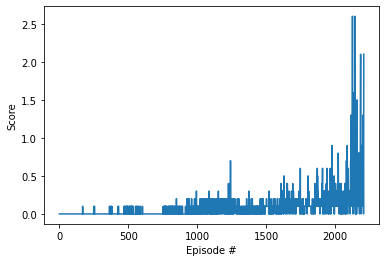

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

#### Model Inference

In [13]:
from maddpg_agent import MADDPG
state_dim = int(env_info.vector_observations.shape[1])
action_dim = int(brain.vector_action_space_size)
random_seed = 10
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") 
agent = MADDPG(num_agents, state_dim, action_dim, 10)

In [14]:
for i, agent_i in enumerate(agent.agents):
    agent_i.actor_local.load_state_dict(torch.load(f"../model_weights/actor_agent_{i+1}.pth"))
    agent_i.critic_local.load_state_dict(torch.load(f"../model_weights/critic_agent_{i+1}.pth"))

In [17]:
for i_episode in range(1, 30):
    env_info = env.reset(train_mode=True)[brain_name]
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    i = 0
    while True:
        i+=1
        actions = agent.act(states)
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            print(i)
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

469
Total score (averaged over agents) this episode: 1.1950000179931521
60
Total score (averaged over agents) this episode: 0.09500000160187483
234
Total score (averaged over agents) this episode: 0.5450000083073974
99
Total score (averaged over agents) this episode: 0.19500000309199095
52
Total score (averaged over agents) this episode: 0.09500000160187483
84
Total score (averaged over agents) this episode: 0.19500000309199095
98
Total score (averaged over agents) this episode: 0.245000003837049
217
Total score (averaged over agents) this episode: 0.5450000083073974
71
Total score (averaged over agents) this episode: 0.1450000023469329
163
Total score (averaged over agents) this episode: 0.3950000060722232
34
Total score (averaged over agents) this episode: 0.09500000160187483
201
Total score (averaged over agents) this episode: 0.4950000084936619
239
Total score (averaged over agents) this episode: 0.5450000083073974
226
Total score (averaged over agents) this episode: 0.445000006817